<a href="https://colab.research.google.com/github/Fatai-soliu/Text-Mining-and-Sentiment-Analysis/blob/main/Text_Mining_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
                  'punkt',
                   'wordnet',
                    'omw-1.4',
                     'vader_lexicon'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
simple_text='This isn\'t a real text, this is an example text...Notice this contains punctuation!!'

In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+')

tokenized_document = tokenizer.tokenize(simple_text)

print(tokenized_document)

['This', "isn't", 'a', 'real', 'text', 'this', 'is', 'an', 'example', 'text', 'Notice', 'this', 'contains', 'punctuation']


In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#Remove stopwords

cleaned_tokens = []

for word in tokenized_document:
  word = word.lower()
  if word not in stop_words:
    cleaned_tokens.append(word)
print(cleaned_tokens)

['real', 'text', 'example', 'text', 'notice', 'contains', 'punctuation']


In [ ]:
#we can also remove stopwords using list comprehension

cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]

print(cleaned_tokens)

['real', 'text', 'example', 'text', 'notice', 'contains', 'punctuation']


In [ ]:
#Explore lemmatization vs stemming

lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

words = ['cacti', 'sings', 'hopped', 'rocks', 'better', 'easily']
pos = ['n', 'v', 'v', 'n','a', 'r']

lemmatized_words = [lemmatizer.lemmatize(words[i], pos=pos[i]) for i in range(6)]
stemmed_words = [stemmer.stem(word) for word in words]

print("Lemmatized words: ", lemmatized_words)
print("Stemmed words:  ", stemmed_words)

Lemmatized words:  ['cactus', 'sing', 'hop', 'rock', 'good', 'easily']
Stemmed words:   ['cacti', 'sing', 'hop', 'rock', 'better', 'easili']


In [ ]:
#Now let's carry out stemming on our example sentence

stemmed_text = [stemmer.stem(word) for word in cleaned_tokens]

print(stemmed_text)

['real', 'text', 'exampl', 'text', 'notic', 'contain', 'punctuat']


In [ ]:
#Let's now create a function to apply all of our data preprocessing steps which we can then use on a corpus

def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) # Tokenize
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] #Remove
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] #Stemming
  return stemmed_text

In [ ]:
data = pd.read_csv("/content/SMSSpamCollection.txt", sep="\t", header = None)
data.columns = ["Target_label", "Text"]

data.head()

,Target_label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print("\n All Data Labels")
print(data.groupby("Target_label").count())


 All Data Labels
              Text
Target_label      
ham           4825
spam           747


In [ ]:
data['Text'] = data['Text'].apply(preprocess_text)

data.head()

,Target_label,Text
0,ham,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,"[ok, lar, joke, wif, u, oni]"
2,spam,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"[nah, think, goe, usf, live, around, though]"


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Text'].map("".join))
X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,5941,5942,5943,5944,5945,5946,5947,5948,5949,5950
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

y = data['Target_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=99)

<Axes: xlabel='Target_label', ylabel='count'>

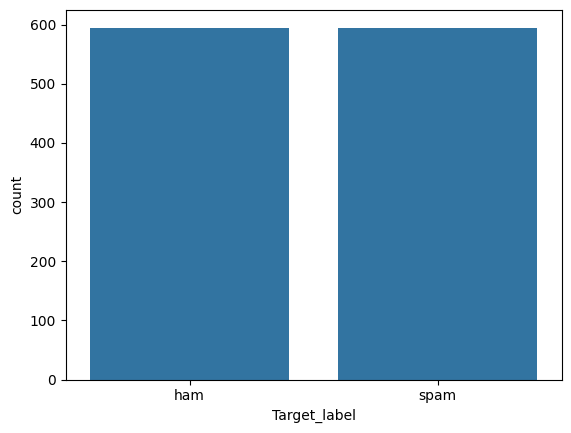

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

resampler = RandomUnderSampler(random_state=0)
X_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_undersampled)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_undersampled, y_train_undersampled)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)

# Computing the accuracy and making the confusion matrix
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm, '\n\n')
print('---------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print("Classification Report: \n",)
print (result)

accuracy:0.19


Confusion Matrix:
[[ 58 905]
 [  0 152]] 


---------------------------------------------------
Classification Report: 

              precision    recall  f1-score   support

         ham       1.00      0.06      0.11       963
        spam       0.14      1.00      0.25       152

    accuracy                           0.19      1115
   macro avg       0.57      0.53      0.18      1115
weighted avg       0.88      0.19      0.13      1115



## Sentiment Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

print(sentiment.polarity_scores('This move is great!'))
print(sentiment.polarity_scores('This move is not great'))

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}
{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5096}


In [ ]:
#Now lets read in our review data

reviews = pd.read_csv('/content/Reviews_of_Amazon_Products (2).csv')

reviews.head()

,Category,name,brand,primaryCategories,reviews.date,reviews.text,reviews.title,reviews.username
0,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-09-03T00:00:00.000Z,I thought it would be as big as small paper bu...,Too small,llyyue
1,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-06-06T00:00:00.000Z,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi
2,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2018-04-20T00:00:00.000Z,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo
3,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-11-02T17:33:31.000Z,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry
4,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2018-04-24T00:00:00.000Z,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack


In [ ]:
reviews.describe()

,Category,name,brand,primaryCategories,reviews.date,reviews.text,reviews.title,reviews.username
count,1123,1123,1123,1123,1123,1123,1123,1123
unique,2,7,1,2,237,1048,820,983
top,Tablet,"Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta",Amazon,Electronics,2017-01-23T00:00:00.000Z,I am really enjoying my new kindle fire hd 8. ...,Great tablet,Mike
freq,1016,797,1123,1112,48,3,56,5


In [ ]:
# We can extract the values from the dictionary and create new columns withing our dataframe

reviews['compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews['reviews.text']]
reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews['reviews.text']]
reviews['neu'] = [sentiment.polarity_scores(review)['neu'] for review in reviews['reviews.text']]
reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews['reviews.text']]

In [ ]:
reviews.head()

,Category,name,brand,primaryCategories,reviews.date,reviews.text,reviews.title,reviews.username,compound,neg,neu,pos
0,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-09-03T00:00:00.000Z,I thought it would be as big as small paper bu...,Too small,llyyue,0.7329,0.081,0.709,0.210
1,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-06-06T00:00:00.000Z,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,0.5826,0.000,0.744,0.256
2,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2018-04-20T00:00:00.000Z,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,0.3612,0.085,0.772,0.143
3,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2017-11-02T17:33:31.000Z,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,0.9727,0.000,0.843,0.157
4,Kindle,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,Electronics,2018-04-24T00:00:00.000Z,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,0.9072,0.000,0.661,0.339


In [ ]:
reviews[['compound', 'neg', 'neu','pos']].describe()

,compound,neg,neu,pos
count,1123.000000,1123.000000,1123.000000,1123.000000
mean,0.623324,0.033545,0.694907,0.271563
std,0.347236,0.058432,0.147549,0.152466
min,-0.867400,0.000000,0.230000,0.000000
25%,0.493900,0.000000,0.592000,0.163000
50%,0.750600,0.000000,0.705000,0.259000
75%,0.865800,0.055500,0.800500,0.380000
max,0.999200,0.475000,1.000000,0.689000


<Axes: xlabel='compound', ylabel='Count'>

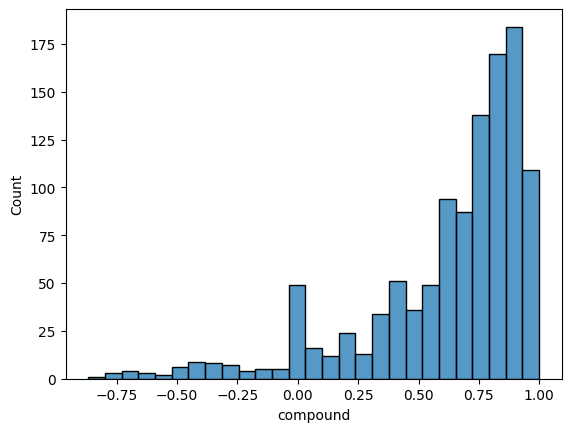

In [ ]:
#Distribution of the compound score

sns.histplot(reviews['compound'])

<Axes: xlabel='pos', ylabel='Count'>

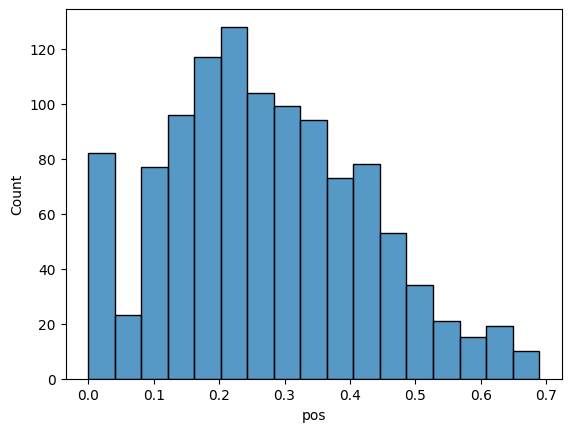

In [ ]:
sns.histplot(reviews['pos'])

<Axes: xlabel='neg', ylabel='Count'>

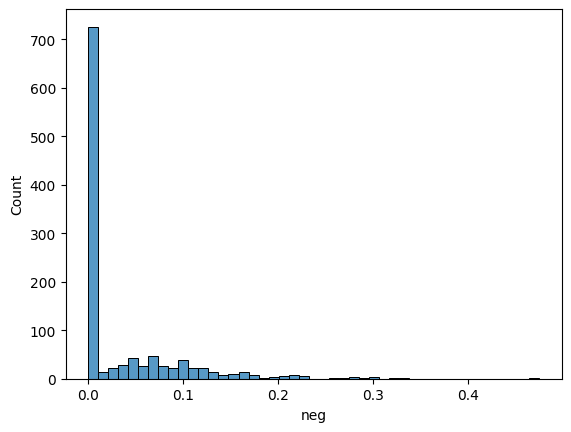

In [ ]:
sns.histplot(reviews['neg'])

In [ ]:
## Let's look at how many negative reviews we have per product

(reviews['compound']<=0).groupby(reviews['name']).sum()

,compound
name,
"Amazon Kindle E-Reader 6"" Wifi (8th Generation, 2016)",12
"Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta",67
"Fire HD 8 Tablet, Wi-Fi, 32 GB-Black",5
"Fire HD 8 Tablet, Wi-Fi, 32 GB-Magenta",5
"Fire HD 8 Tablet, Wi-Fi, 16 GB-Blue",1
"Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue",10
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",1


In [ ]:
## calculate as percentage of total reviews

percent_negative  = pd.DataFrame((reviews['compound']<=0).groupby(reviews['name']).sum()
                                /reviews['name'].groupby(reviews['name']).count()*100,
                                columns=['% negative reviews']).sort_values(by='% negative reviews')

percent_negative

,% negative reviews
name,
"Fire HD 8 Tablet, Wi-Fi, 16 GB-Blue",1.960784
"Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta",8.406524
"Fire HD 8 Tablet, Wi-Fi, 32 GB-Black",8.620690
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",9.090909
"Amazon Kindle E-Reader 6"" Wifi (8th Generation, 2016)",12.500000
"Fire HD 8 Tablet, Wi-Fi, 32 GB-Magenta",12.500000
"Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue",14.285714


<Axes: xlabel='% negative reviews', ylabel='name'>

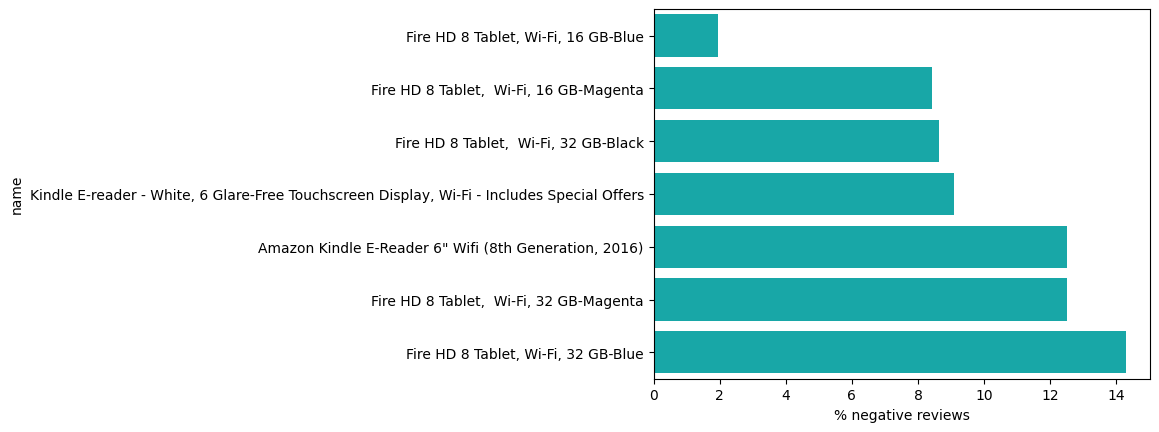

In [ ]:
sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='c')

In [ ]:
reviews.tail()

,Category,name,brand,primaryCategories,reviews.date,reviews.text,reviews.title,reviews.username,compound,neg,neu,pos
1118,Tablet,"Fire HD 8 Tablet, Wi-Fi, 32 GB-Magenta",Amazon,Electronics,2017-05-07T00:00:00.000Z,Pretty decent tablet. Good for mindless games ...,Good basic tablet,ChrisH,0.4215,0.201,0.514,0.285
1119,Tablet,"Fire HD 8 Tablet, Wi-Fi, 32 GB-Black",Amazon,Electronics,2017-03-10T00:00:00.000Z,We replaced and aging fire HDX. She noticed th...,My wife loves it,Kevinandkalii,0.1779,0.084,0.807,0.109
1120,Tablet,"Fire HD 8 Tablet, Wi-Fi, 32 GB-Magenta",Amazon,Electronics,2017-03-03T00:00:00.000Z,"I have one, purchased this one for my mother i...",HD makes big difference,Roseyj,0.6103,0.000,0.889,0.111
1121,Tablet,"Fire HD 8 Tablet, Wi-Fi, 32 GB-Black",Amazon,Electronics,2017-01-17T00:00:00.000Z,This was a Christmas present. The person that ...,Great gift!,Hello,0.7577,0.000,0.812,0.188
1122,Tablet,"Fire HD 8 Tablet, Wi-Fi, 32 GB-Black",Amazon,Electronics,2016-11-18T00:00:00.000Z,My husband loves this. He is happy that he can...,Best gift,Ellen,0.8126,0.000,0.817,0.183


In [ ]:
print(reviews['name'].unique())


['Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)'
 'Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers'
 'Fire HD 8 Tablet, Wi-Fi, 16 GB-Blue'
 'Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue'
 'Fire HD 8 Tablet,  Wi-Fi, 16 GB-Magenta'
 'Fire HD 8 Tablet,  Wi-Fi, 32 GB-Black'
 'Fire HD 8 Tablet,  Wi-Fi, 32 GB-Magenta']


In [ ]:
#Process the text data ready for wordcloud visualisation, using the function we defind earlier
# For this part of the exercise we will focus specifically on Fire HD 8 Tablet, Wi-Fi, 16 GB-Magenta

reviews['processed_review'] = reviews['reviews.text'].apply(preprocess_text)

# Fix for positive subset
reviews_positive_subset = reviews.loc[
    (reviews['name'] == 'Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue') &
    (reviews['compound'] > 0)
]

reviews_negative_subset = reviews.loc[(reviews['name']=='Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue')
                                       & (reviews['compound']<=0),:]

reviews_negative_subset.head()

,Category,name,brand,primaryCategories,reviews.date,reviews.text,reviews.title,reviews.username,compound,neg,neu,pos,processed_review
117,Tablet,"Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue",Amazon,Electronics,2016-12-24T00:00:00.000Z,The last 2 models of Kindle HDX 8 have been te...,Not impressed with the last 2 Kindles.,Paloma,-0.7263,0.096,0.869,0.035,"[last, 2, model, kindl, hdx, 8, terribl, purch..."
132,Tablet,"Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue",Amazon,Electronics,2017-02-17T00:00:00.000Z,Wanted something with a kids mode on it so we ...,Tablet for the kiddo,MaizeNBlue,-0.3384,0.068,0.932,0.000,"[want, someth, kid, mode, could, limit, time, ..."
142,Tablet,"Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue",Amazon,Electronics,2017-04-01T00:00:00.000Z,"I have not set up tablet, geeks squad to do so...",i love ‚ù§ tablet,lonely,-0.1027,0.104,0.896,0.000,"[set, tablet, geek, squad, monday, april, 3, 2..."
159,Tablet,"Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue",Amazon,Electronics,2017-05-26T00:00:00.000Z,Easy-to-use. Lots of books obviously but also ...,Awesome product,JDogg,0.0000,0.000,1.000,0.000,"[easi, use, lot, book, obvious, also, lot, app]"
161,Tablet,"Fire HD 8 Tablet, Wi-Fi, 32 GB-Blue",Amazon,Electronics,2017-02-09T00:00:00.000Z,I hate amazon app store. Nothing good in there...,tons of limitations,dieselxdan,-0.7790,0.302,0.638,0.060,"[hate, amazon, app, store, noth, good, tablet,..."


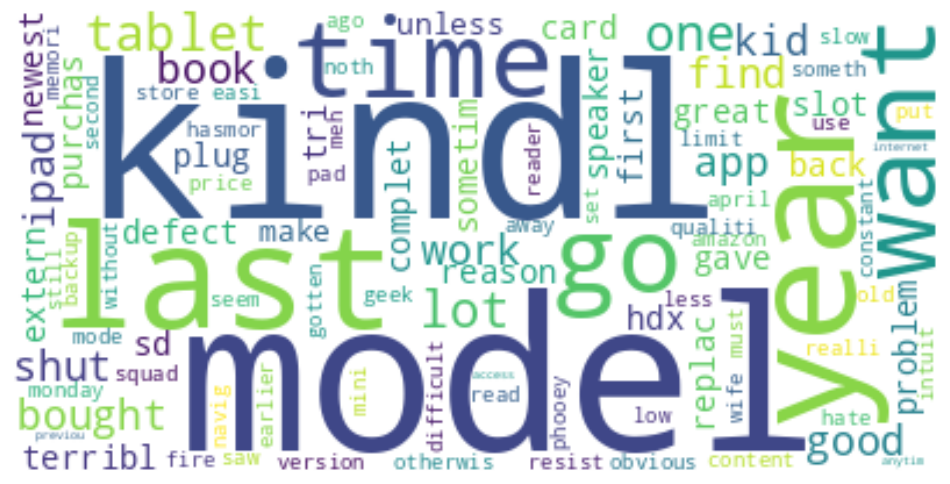

In [ ]:
## Wordcloud of words from negative reviews by product

neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

#Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

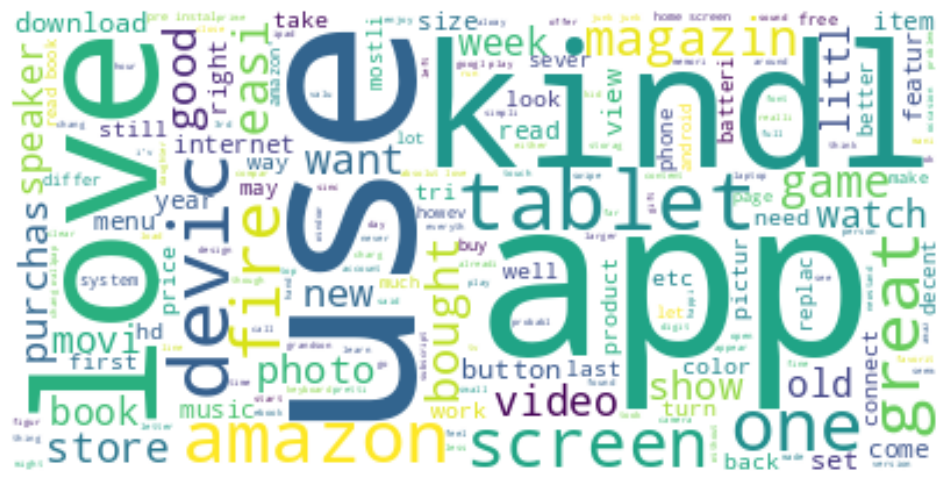

In [ ]:
#For positive review

pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))

#Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Use the nltk FreDist and then tabulate

from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_tokens)

pos_freqdist.tabulate(10)

   use    app   love  kindl tablet  devic screen    one amazon  great 
    41     37     34     31     29     29     23     22     22     19 


In [ ]:
# Use the nltk FreDist and then tabulate

from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_tokens)

neg_freqdist.tabulate(10)

 model  kindl   last   year      2   time     go   want tablet    lot 
     5      5      4      4      3      3      3      3      3      3 


<Axes: xlabel='Samples', ylabel='Counts'>

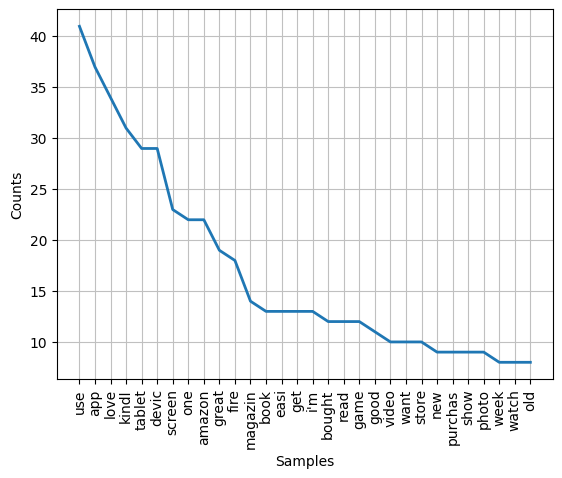

In [ ]:
pos_freqdist.plot(30)

<Axes: xlabel='Samples', ylabel='Counts'>

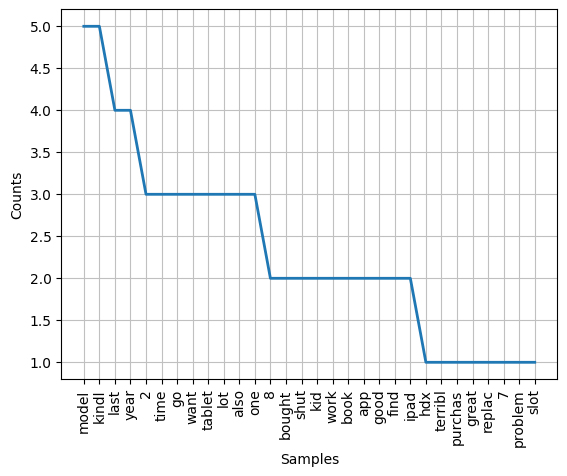

In [ ]:
neg_freqdist.plot(30)